In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
data.shape

(20800, 5)

In [6]:
data=data.dropna()

In [7]:
data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [8]:
data.shape

(18285, 5)

In [9]:
data['label'].value_counts()

label
0    10361
1     7924
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

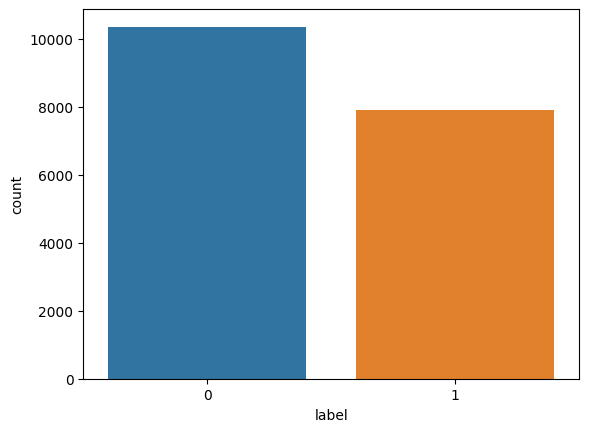

In [10]:
import seaborn as sb
sb.countplot(x='label',data=data)

In [11]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [12]:
x=data.drop('label',axis=1)

In [13]:
y=data['label']

In [37]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [15]:
message=x.copy()

In [16]:
message.reset_index(inplace=True)

In [17]:
import nltk
import re
from nltk.corpus import stopwords

In [18]:
voc_size=5000

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Saimum Adil
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.stem.porter import PorterStemmer

In [21]:
ps=PorterStemmer()
corpus=[]
for i in range(0,len(message)):
    print(i,end=',')
    review=re.sub('[^a-zA-Z]',' ',message['title'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not  word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,27

1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,

3541,3542,3543,3544,3545,3546,3547,3548,3549,3550,3551,3552,3553,3554,3555,3556,3557,3558,3559,3560,3561,3562,3563,3564,3565,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575,3576,3577,3578,3579,3580,3581,3582,3583,3584,3585,3586,3587,3588,3589,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599,3600,3601,3602,3603,3604,3605,3606,3607,3608,3609,3610,3611,3612,3613,3614,3615,3616,3617,3618,3619,3620,3621,3622,3623,3624,3625,3626,3627,3628,3629,3630,3631,3632,3633,3634,3635,3636,3637,3638,3639,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650,3651,3652,3653,3654,3655,3656,3657,3658,3659,3660,3661,3662,3663,3664,3665,3666,3667,3668,3669,3670,3671,3672,3673,3674,3675,3676,3677,3678,3679,3680,3681,3682,3683,3684,3685,3686,3687,3688,3689,3690,3691,3692,3693,3694,3695,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705,3706,3707,3708,3709,3710,3711,3712,3713,3714,3715,3716,3717,3718,3719,3720,3721,3722,3723,3724,3725,3726,3727,3728,3729,3730,3731,3732,3733,3734,3735,3736,3737,3738,3739,3740,

5197,5198,5199,5200,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210,5211,5212,5213,5214,5215,5216,5217,5218,5219,5220,5221,5222,5223,5224,5225,5226,5227,5228,5229,5230,5231,5232,5233,5234,5235,5236,5237,5238,5239,5240,5241,5242,5243,5244,5245,5246,5247,5248,5249,5250,5251,5252,5253,5254,5255,5256,5257,5258,5259,5260,5261,5262,5263,5264,5265,5266,5267,5268,5269,5270,5271,5272,5273,5274,5275,5276,5277,5278,5279,5280,5281,5282,5283,5284,5285,5286,5287,5288,5289,5290,5291,5292,5293,5294,5295,5296,5297,5298,5299,5300,5301,5302,5303,5304,5305,5306,5307,5308,5309,5310,5311,5312,5313,5314,5315,5316,5317,5318,5319,5320,5321,5322,5323,5324,5325,5326,5327,5328,5329,5330,5331,5332,5333,5334,5335,5336,5337,5338,5339,5340,5341,5342,5343,5344,5345,5346,5347,5348,5349,5350,5351,5352,5353,5354,5355,5356,5357,5358,5359,5360,5361,5362,5363,5364,5365,5366,5367,5368,5369,5370,5371,5372,5373,5374,5375,5376,5377,5378,5379,5380,5381,5382,5383,5384,5385,5386,5387,5388,5389,5390,5391,5392,5393,5394,5395,5396,

6856,6857,6858,6859,6860,6861,6862,6863,6864,6865,6866,6867,6868,6869,6870,6871,6872,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911,6912,6913,6914,6915,6916,6917,6918,6919,6920,6921,6922,6923,6924,6925,6926,6927,6928,6929,6930,6931,6932,6933,6934,6935,6936,6937,6938,6939,6940,6941,6942,6943,6944,6945,6946,6947,6948,6949,6950,6951,6952,6953,6954,6955,6956,6957,6958,6959,6960,6961,6962,6963,6964,6965,6966,6967,6968,6969,6970,6971,6972,6973,6974,6975,6976,6977,6978,6979,6980,6981,6982,6983,6984,6985,6986,6987,6988,6989,6990,6991,6992,6993,6994,6995,6996,6997,6998,6999,7000,7001,7002,7003,7004,7005,7006,7007,7008,7009,7010,7011,7012,7013,7014,7015,7016,7017,7018,7019,7020,7021,7022,7023,7024,7025,7026,7027,7028,7029,7030,7031,7032,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042,7043,7044,7045,7046,7047,7048,7049,7050,7051,7052,7053,7054,7055,

8523,8524,8525,8526,8527,8528,8529,8530,8531,8532,8533,8534,8535,8536,8537,8538,8539,8540,8541,8542,8543,8544,8545,8546,8547,8548,8549,8550,8551,8552,8553,8554,8555,8556,8557,8558,8559,8560,8561,8562,8563,8564,8565,8566,8567,8568,8569,8570,8571,8572,8573,8574,8575,8576,8577,8578,8579,8580,8581,8582,8583,8584,8585,8586,8587,8588,8589,8590,8591,8592,8593,8594,8595,8596,8597,8598,8599,8600,8601,8602,8603,8604,8605,8606,8607,8608,8609,8610,8611,8612,8613,8614,8615,8616,8617,8618,8619,8620,8621,8622,8623,8624,8625,8626,8627,8628,8629,8630,8631,8632,8633,8634,8635,8636,8637,8638,8639,8640,8641,8642,8643,8644,8645,8646,8647,8648,8649,8650,8651,8652,8653,8654,8655,8656,8657,8658,8659,8660,8661,8662,8663,8664,8665,8666,8667,8668,8669,8670,8671,8672,8673,8674,8675,8676,8677,8678,8679,8680,8681,8682,8683,8684,8685,8686,8687,8688,8689,8690,8691,8692,8693,8694,8695,8696,8697,8698,8699,8700,8701,8702,8703,8704,8705,8706,8707,8708,8709,8710,8711,8712,8713,8714,8715,8716,8717,8718,8719,8720,8721,8722,

10153,10154,10155,10156,10157,10158,10159,10160,10161,10162,10163,10164,10165,10166,10167,10168,10169,10170,10171,10172,10173,10174,10175,10176,10177,10178,10179,10180,10181,10182,10183,10184,10185,10186,10187,10188,10189,10190,10191,10192,10193,10194,10195,10196,10197,10198,10199,10200,10201,10202,10203,10204,10205,10206,10207,10208,10209,10210,10211,10212,10213,10214,10215,10216,10217,10218,10219,10220,10221,10222,10223,10224,10225,10226,10227,10228,10229,10230,10231,10232,10233,10234,10235,10236,10237,10238,10239,10240,10241,10242,10243,10244,10245,10246,10247,10248,10249,10250,10251,10252,10253,10254,10255,10256,10257,10258,10259,10260,10261,10262,10263,10264,10265,10266,10267,10268,10269,10270,10271,10272,10273,10274,10275,10276,10277,10278,10279,10280,10281,10282,10283,10284,10285,10286,10287,10288,10289,10290,10291,10292,10293,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303,10304,10305,10306,10307,10308,10309,10310,10311,10312,10313,10314,10315,10316,10317,10318,1031

11538,11539,11540,11541,11542,11543,11544,11545,11546,11547,11548,11549,11550,11551,11552,11553,11554,11555,11556,11557,11558,11559,11560,11561,11562,11563,11564,11565,11566,11567,11568,11569,11570,11571,11572,11573,11574,11575,11576,11577,11578,11579,11580,11581,11582,11583,11584,11585,11586,11587,11588,11589,11590,11591,11592,11593,11594,11595,11596,11597,11598,11599,11600,11601,11602,11603,11604,11605,11606,11607,11608,11609,11610,11611,11612,11613,11614,11615,11616,11617,11618,11619,11620,11621,11622,11623,11624,11625,11626,11627,11628,11629,11630,11631,11632,11633,11634,11635,11636,11637,11638,11639,11640,11641,11642,11643,11644,11645,11646,11647,11648,11649,11650,11651,11652,11653,11654,11655,11656,11657,11658,11659,11660,11661,11662,11663,11664,11665,11666,11667,11668,11669,11670,11671,11672,11673,11674,11675,11676,11677,11678,11679,11680,11681,11682,11683,11684,11685,11686,11687,11688,11689,11690,11691,11692,11693,11694,11695,11696,11697,11698,11699,11700,11701,11702,11703,1170

12905,12906,12907,12908,12909,12910,12911,12912,12913,12914,12915,12916,12917,12918,12919,12920,12921,12922,12923,12924,12925,12926,12927,12928,12929,12930,12931,12932,12933,12934,12935,12936,12937,12938,12939,12940,12941,12942,12943,12944,12945,12946,12947,12948,12949,12950,12951,12952,12953,12954,12955,12956,12957,12958,12959,12960,12961,12962,12963,12964,12965,12966,12967,12968,12969,12970,12971,12972,12973,12974,12975,12976,12977,12978,12979,12980,12981,12982,12983,12984,12985,12986,12987,12988,12989,12990,12991,12992,12993,12994,12995,12996,12997,12998,12999,13000,13001,13002,13003,13004,13005,13006,13007,13008,13009,13010,13011,13012,13013,13014,13015,13016,13017,13018,13019,13020,13021,13022,13023,13024,13025,13026,13027,13028,13029,13030,13031,13032,13033,13034,13035,13036,13037,13038,13039,13040,13041,13042,13043,13044,13045,13046,13047,13048,13049,13050,13051,13052,13053,13054,13055,13056,13057,13058,13059,13060,13061,13062,13063,13064,13065,13066,13067,13068,13069,13070,1307

14298,14299,14300,14301,14302,14303,14304,14305,14306,14307,14308,14309,14310,14311,14312,14313,14314,14315,14316,14317,14318,14319,14320,14321,14322,14323,14324,14325,14326,14327,14328,14329,14330,14331,14332,14333,14334,14335,14336,14337,14338,14339,14340,14341,14342,14343,14344,14345,14346,14347,14348,14349,14350,14351,14352,14353,14354,14355,14356,14357,14358,14359,14360,14361,14362,14363,14364,14365,14366,14367,14368,14369,14370,14371,14372,14373,14374,14375,14376,14377,14378,14379,14380,14381,14382,14383,14384,14385,14386,14387,14388,14389,14390,14391,14392,14393,14394,14395,14396,14397,14398,14399,14400,14401,14402,14403,14404,14405,14406,14407,14408,14409,14410,14411,14412,14413,14414,14415,14416,14417,14418,14419,14420,14421,14422,14423,14424,14425,14426,14427,14428,14429,14430,14431,14432,14433,14434,14435,14436,14437,14438,14439,14440,14441,14442,14443,14444,14445,14446,14447,14448,14449,14450,14451,14452,14453,14454,14455,14456,14457,14458,14459,14460,14461,14462,14463,1446

15682,15683,15684,15685,15686,15687,15688,15689,15690,15691,15692,15693,15694,15695,15696,15697,15698,15699,15700,15701,15702,15703,15704,15705,15706,15707,15708,15709,15710,15711,15712,15713,15714,15715,15716,15717,15718,15719,15720,15721,15722,15723,15724,15725,15726,15727,15728,15729,15730,15731,15732,15733,15734,15735,15736,15737,15738,15739,15740,15741,15742,15743,15744,15745,15746,15747,15748,15749,15750,15751,15752,15753,15754,15755,15756,15757,15758,15759,15760,15761,15762,15763,15764,15765,15766,15767,15768,15769,15770,15771,15772,15773,15774,15775,15776,15777,15778,15779,15780,15781,15782,15783,15784,15785,15786,15787,15788,15789,15790,15791,15792,15793,15794,15795,15796,15797,15798,15799,15800,15801,15802,15803,15804,15805,15806,15807,15808,15809,15810,15811,15812,15813,15814,15815,15816,15817,15818,15819,15820,15821,15822,15823,15824,15825,15826,15827,15828,15829,15830,15831,15832,15833,15834,15835,15836,15837,15838,15839,15840,15841,15842,15843,15844,15845,15846,15847,1584

17082,17083,17084,17085,17086,17087,17088,17089,17090,17091,17092,17093,17094,17095,17096,17097,17098,17099,17100,17101,17102,17103,17104,17105,17106,17107,17108,17109,17110,17111,17112,17113,17114,17115,17116,17117,17118,17119,17120,17121,17122,17123,17124,17125,17126,17127,17128,17129,17130,17131,17132,17133,17134,17135,17136,17137,17138,17139,17140,17141,17142,17143,17144,17145,17146,17147,17148,17149,17150,17151,17152,17153,17154,17155,17156,17157,17158,17159,17160,17161,17162,17163,17164,17165,17166,17167,17168,17169,17170,17171,17172,17173,17174,17175,17176,17177,17178,17179,17180,17181,17182,17183,17184,17185,17186,17187,17188,17189,17190,17191,17192,17193,17194,17195,17196,17197,17198,17199,17200,17201,17202,17203,17204,17205,17206,17207,17208,17209,17210,17211,17212,17213,17214,17215,17216,17217,17218,17219,17220,17221,17222,17223,17224,17225,17226,17227,17228,17229,17230,17231,17232,17233,17234,17235,17236,17237,17238,17239,17240,17241,17242,17243,17244,17245,17246,17247,1724

In [22]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [23]:
onehot_rep=[one_hot(words,voc_size) for words in corpus]

In [24]:
onehot_rep

[[3417, 2687, 3827, 3103, 2017, 1436, 2746, 2460, 4739, 425],
 [4526, 28, 4841, 4920, 4024, 743, 2371],
 [4319, 4219, 1754, 4958],
 [317, 1011, 1754, 3484, 4782, 4617],
 [2432, 4024, 4285, 1329, 3433, 1772, 4024, 3271, 2301, 698],
 [4354,
  4123,
  4826,
  2853,
  848,
  4719,
  432,
  3005,
  3293,
  480,
  2640,
  178,
  2421,
  693,
  2371],
 [1236, 3370, 4926, 3761, 3938, 3693, 878, 3113, 3128, 2901, 2927],
 [1445, 2363, 2633, 4977, 2683, 1687, 4719, 2096, 3128, 2901, 2927],
 [3474, 2199, 2064, 4492, 4730, 4436, 1266, 3115, 4719, 3830],
 [4898, 4605, 3831, 3715, 2928, 2505, 2021, 2413],
 [2838, 1198, 3299, 1471, 3507, 2123, 320, 2703, 689, 2971, 706],
 [3484, 3266, 2017, 4436, 4719, 2683],
 [2186, 66, 3971, 2956, 523, 185, 1493, 4674, 4901],
 [595, 1485, 3252, 1420, 4043, 2824, 52, 3128, 2901, 2927],
 [3657, 689, 1735, 1628, 2598, 3128, 2901, 2927],
 [3783, 393, 316, 4105, 4332, 3090, 427, 937, 335, 2055],
 [1215, 3910, 28],
 [3435, 4181, 1421, 4770, 4719, 1882, 2344, 2371],
 [3614

In [29]:
sent_length=20
embedded_doc=pad_sequences(onehot_rep,padding='pre',maxlen=sent_length)

In [30]:
embedded_doc

array([[   0,    0,    0, ..., 2460, 4739,  425],
       [   0,    0,    0, ..., 4024,  743, 2371],
       [   0,    0,    0, ..., 4219, 1754, 4958],
       ...,
       [   0,    0,    0, ..., 3128, 2901, 2927],
       [   0,    0,    0, ..., 2028, 3843, 2412],
       [   0,    0,    0, ..., 3921, 2416,  782]])

In [32]:
#Creating Model
embedded_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedded_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [38]:
#Creating model
model1=Sequential()
model1.add(Embedding(voc_size,embedded_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 40)            200000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              112800    
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________


In [40]:
x_final=np.array(embedded_doc)
y_final=np.array(y)

In [41]:
x_final.shape , y_final.shape

((18285, 20), (18285,))

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(x_final,y_final,test_size=0.25,random_state=42)

In [44]:
model1.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50,batch_size=64)

Epoch 1/50
215/215 [==============================] - 18s 52ms/step - loss: 0.2905 - accuracy: 0.8674 - val_loss: 0.2007 - val_accuracy: 0.9145
Epoch 2/50
215/215 [==============================] - 10s 46ms/step - loss: 0.1388 - accuracy: 0.9454 - val_loss: 0.2275 - val_accuracy: 0.9129
Epoch 3/50
215/215 [==============================] - 10s 47ms/step - loss: 0.1020 - accuracy: 0.9609 - val_loss: 0.2663 - val_accuracy: 0.9092
Epoch 4/50
215/215 [==============================] - 10s 46ms/step - loss: 0.0815 - accuracy: 0.9727 - val_loss: 0.2630 - val_accuracy: 0.9064
Epoch 5/50
215/215 [==============================] - 10s 47ms/step - loss: 0.0642 - accuracy: 0.9778 - val_loss: 0.2928 - val_accuracy: 0.9064
Epoch 6/50
215/215 [==============================] - 10s 46ms/step - loss: 0.0464 - accuracy: 0.9844 - val_loss: 0.3780 - val_accuracy: 0.9011
Epoch 7/50
215/215 [==============================] - 10s 48ms/step - loss: 0.0314 - accuracy: 0.9906 - val_loss: 0.4181 - val_accuracy:

In [55]:
test=pd.read_csv('test.csv')

In [56]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [57]:
test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [49]:
from tensorflow.keras.models import save_model

In [50]:
save_model(model1,'fake_news_model.h5')

In [58]:
test=test.dropna()

In [59]:
test.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

In [60]:
test.shape

(4575, 4)

In [61]:
test.reset_index(inplace=True)

In [65]:
ps=PorterStemmer()
new_test=[]
for j in range(0,len(test)):
    print(j,end=',')
    rest=re.sub('[^a-zA-Z]',' ',test['title'][j])
    rest=rest.lower()
    rest=rest.split()
    rest=[ps.stem(text) for text in rest if not text in stopwords.words('english')]
    rest=' '.join(rest)
    new_test.append(rest)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,27

1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,

3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539,3540,3541,3542,3543,3544,3545,3546,3547,3548,3549,3550,3551,3552,3553,3554,3555,3556,3557,3558,3559,3560,3561,3562,3563,3564,3565,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575,3576,3577,3578,3579,3580,3581,3582,3583,3584,3585,3586,3587,3588,3589,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599,3600,3601,3602,3603,3604,3605,3606,3607,3608,3609,3610,3611,3612,3613,3614,3615,3616,3617,3618,3619,3620,3621,3622,3623,3624,3625,3626,3627,3628,3629,3630,3631,3632,3633,3634,3635,3636,3637,3638,3639,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650,3651,3652,3653,3654,3655,3656,3657,3658,3659,3660,3661,3662,3663,3664,3665,3666,3667,3668,3669,3670,3671,3672,3673,3674,3675,3676,3677,3678,3679,3680,3681,3682,3683,3684,3685,3686,3687,3688,3689,3690,3691,3692,3693,3694,3695,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705,3706,3707,3708,3709,3710,3711,3712,3713,

In [67]:
new_test

['specter trump loosen tongu purs string silicon valley new york time',
 'nodapl nativ american leader vow stay winter file lawsuit polic',
 'tim tebow attempt anoth comeback time basebal new york time',
 'keiser report meme war e',
 'pelosi call fbi investig find russian donald trump breitbart',
 'weekli featur profil randi shannon',
 'u gener admir endors trump command chief',
 'work class hero john brennon',
 'rise mandatori vaccin mean end medic freedom',
 'communist terror small busi',
 'comput programm come forward admit paid rig vote booth trump right usa newsflash',
 'thiev take chunk chang pound berlin museum new york time',
 'new england patriot owner still sore n f l payback sight new york time',
 'colleg republican yaf sue berkeley ann coulter event breitbart',
 'trump melt accus us postal servic steal elect clinton',
 'visit madagascar leav red swimsuit lemur recip home new york time',
 'rees peanut butter cup cheap full toxic chemic',
 'presid obama presid elect donald tr

In [68]:
one_hottet_test=[one_hot(word,voc_size) for word in new_test]

In [69]:
one_hottet_test

[[227, 4719, 2131, 1277, 4974, 1551, 4151, 4271, 3128, 2901, 2927],
 [494, 4356, 835, 2714, 4942, 4626, 2900, 138, 3429, 791],
 [879, 1444, 191, 3621, 1941, 2927, 1094, 3128, 2901, 2927],
 [3937, 3990, 4644, 2336, 1497],
 [374, 4180, 1215, 1034, 4043, 2838, 4770, 4719, 2371],
 [676, 2837, 3013, 517, 3150],
 [1368, 3480, 674, 2596, 4719, 1164, 1735],
 [3765, 3741, 4314, 449, 2173],
 [4901, 1802, 1385, 1668, 1224, 458, 2215],
 [4990, 3519, 169, 296],
 [1304, 3038, 2327, 4762, 4513, 66, 4720, 2156, 1291, 4719, 1961, 613, 3597],
 [3768, 1229, 2511, 4381, 3061, 2489, 4619, 3128, 2901, 2927],
 [3128,
  2151,
  4404,
  4718,
  3646,
  4727,
  4640,
  2416,
  2869,
  1191,
  2892,
  3128,
  2901,
  2927],
 [2919, 1392, 3458, 4140, 2228, 4409, 1522, 3698, 2371],
 [4719, 2688, 4075, 3484, 4720, 1969, 1428, 4290, 4841],
 [2232, 3233, 1179, 158, 272, 549, 205, 2824, 3128, 2901, 2927],
 [2539, 212, 197, 1923, 2850, 3589, 492, 3272],
 [531, 3474, 531, 4290, 4770, 4719, 1956, 1238, 3417],
 [3715, 389

In [71]:
embedded_test=pad_sequences(one_hottet_test,padding='pre',maxlen=sent_length)

In [72]:
embedded_test

array([[   0,    0,    0, ..., 3128, 2901, 2927],
       [   0,    0,    0, ...,  138, 3429,  791],
       [   0,    0,    0, ..., 3128, 2901, 2927],
       ...,
       [   0,    0,    0, ..., 3128, 2901, 2927],
       [   0,    0,    0, ..., 3128, 2901, 2927],
       [   0,    0,    0, ..., 3128, 2901, 2927]])

In [73]:
pred=model1.predict(embedded_test)

143/143 [==============================] - 2s 9ms/step


In [74]:
pred

array([[3.0713810e-08],
       [2.1199909e-01],
       [5.2481209e-07],
       ...,
       [3.5861689e-11],
       [2.7688489e-07],
       [3.6579380e-08]], dtype=float32)

In [75]:
pred_new=np.where(pred>0.5,1,0)

In [76]:
pred_new

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [82]:
test['id'].shape, pred_new.shape

((4575,), (4575, 1))

In [83]:
pred_new=pred_new.reshape(-1)

In [84]:
pred_new.shape

(4575,)

In [89]:
submit=pd.DataFrame({'id':test['id'],'label':pred_new})

In [90]:
submit.head()

,id,label
0,20800,0
1,20802,0
2,20803,0
3,20804,1
4,20806,0


In [91]:
submit.to_csv('submit.csv',index=False)

In [92]:
test.shape

(4575, 5)